# Image plates of duckweed in growth assay experiment

Ensure the following before running anything in this notebook:
 - The machine is switched on, connected to the computer and all axes have been homed. 
 - The camera tool is accessible and in position 1 on the Jubilee
 
 Once those steps are complete run the cells in this notebook in order

In [1]:
#Importing python libraries downloaded from the internet and those saved locally

import yaml
import matplotlib
matplotlib.use('TkAgg') 
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import json
import threading
from datetime import date
import ipywidgets as widgets
import utils.PlatePositionUtils as pp 


In [2]:
#This cell will only run if you are working at a computer connected to the Jubilee

from utils.MachineUtils import * 
from utils.CameraUtils import * #Note that this library requirs a package that can only be installed on raspbery pi. 
import utils.ImageCaptureUtils as im

In [3]:
port = '/dev/ttyACM0'
m = MachineCommunication(port)
m.toolChange(1)

## 1. Select config files and directory for image data

### Select the computer you are currently working on to get the correct config file location### Select config file location

In [4]:
config_file_dirs = {'Orlandos macbook': '/Users/Orlando/Documents/Github_clones/duckbot/ConfigFiles', 'Jubilee Pi' :
                     "/home/pi/duckbot/ConfigFiles"}
config_dir_opts = [x for x in config_file_dirs]

config_dir_opts = config_file_dirs
dir_choice = widgets.Dropdown(options = config_dir_opts)
display(dir_choice)

Dropdown(options=('/Users/Orlando/Documents/Github_clones/duckbot/ConfigFiles', '/home/pi/duckbot/ConfigFiles'…

In [5]:
computer = config_file_dirs[dir_choice.value]
expt_config_file_dir = os.path.join(computer,'ExptConfigs')

### Select config file
Select the config file that matches the experiment you are collecting data for

In [6]:
os.chdir(expt_config_file_dir)
config_opts = os.listdir(os.getcwd())
expt_choice = widgets.Dropdown(options = config_opts)
display(expt_choice)

Dropdown(options=('Test_082422.json', 'Expt_082222.json', 'Test_expt.json', 'Test_082422_3.json', 'Test_082422…

In [8]:
print("You selected:")
print(expt_choice.value)
print("If this is not correct re-select before continuing")

You selected:
Expt_082222.json
If this is not correct re-select before continuing


In [9]:
expt_setup_filepath = expt_config_file_dir + '/' + expt_choice.value

In [10]:
with open(expt_setup_filepath,'r') as datafile:
    expt_data = json.load(datafile)

#Host directory that you want to host the folder with your image files. End with forward slash
output_data_dir_opts = expt_data["Experimental_data_directories"]
sample_data_dict = expt_data["sample_info"]
expt_name = expt_data["Experiment_name"]

In [12]:
data_dir_choice = widgets.Dropdown(options = output_data_dir_opts)
display(data_dir_choice)

Dropdown(options=('/Users/Orlando/Documents/Github_clones/duckbot/test_data/Test_082422', '/home/pi/Documents/…

In [13]:
Experimental_data_host_directory = data_dir_choice.value

In [14]:
if not os.path.exists(Experimental_data_host_directory):
    print("This path does not exist. Please correct or create required folders and then re-run this cell")
    print(Experimental_data_host_directory)

if os.path.exists(Experimental_data_host_directory):
    data_dir = os.path.join(Experimental_data_host_directory, expt_name)
    if not os.path.exists(data_dir):
        os.mkdir(data_dir) 

## 2. Load plates into machine

In [15]:
#Drop bed down and add plates
plates_to_image = im.pull_plates_to_image(expt_setup_filepath)

m.moveTo(z=100)

print(f'Load the following experimental plates into the appropriate positions on the bed: {plates_to_image}')
print("Add plates to the bed. Hit any button to confirm and proceed")
input()

Load the following experimental plates into the appropriate positions on the bed: ['1', '2', '3']
Add plates to the bed. Hit any button to confirm and proceed
y


'y'

## 3. Focus camera
Run the cells below. It will move the camera over the first well of the first plate and then pop up a live camera window. Manually adjust the focus to the desired point by twisting the housing of the camera lens. You will need to loosen the nut that holds the lens in place to be able to adjust the focus and then tighten it again once you are done. Then hit the escape key to close the window

In [16]:
#Move camera over first well to be imaged
im.move_to_first_well(m, plates_to_image)

In [17]:
#Open a live video window
cap = cv2.VideoCapture(0) #Note that the index corresponding to your camera may not be zero but this is the most common default

while True:
    ret, frame = cap.read()
    cv2.imshow('Input', frame)
    c = cv2.waitKey(1)
    if c ==27: #27 is the built in code for ESC so press escape to close the window. 
        break 
        
cap.release()

cv2.destroyAllWindows()

## 4. Capture and save images

Imaging every well, will take approx. 1.0 minutes
Imaging well A1
Imaging well A2
Imaging well A3
Imaging well A4
Imaging well A5
Imaging well A6
Imaging well B1
Imaging well B2
Imaging well B3
Imaging well B4
Imaging well B5
Imaging well B6
Imaging well C1
Imaging well C2
Imaging well C3
Imaging well C4
Imaging well C5
Imaging well C6
Imaging well D1
Imaging well D2
Imaging well D3
Imaging well D4
Imaging well D5
Imaging well D6
Imaging well A1
Imaging well A2
Imaging well A3
Imaging well A4
Imaging well A5
Imaging well A6
Imaging well B1
Imaging well B2
Imaging well B3
Imaging well B4
Imaging well B5
Imaging well B6
Imaging well C1
Imaging well C2
Imaging well C3
Imaging well C4
Imaging well C5
Imaging well C6
Imaging well D1
Imaging well D2
Imaging well D3
Imaging well D4
Imaging well D5
Imaging well D6
Imaging well A1
Imaging well A2
Imaging well A3
Imaging well A4
Imaging well A5
Imaging well A6
Imaging well B1
Imaging well B2
Imaging well B3
Imaging well B4
Imaging well B5
Imagin

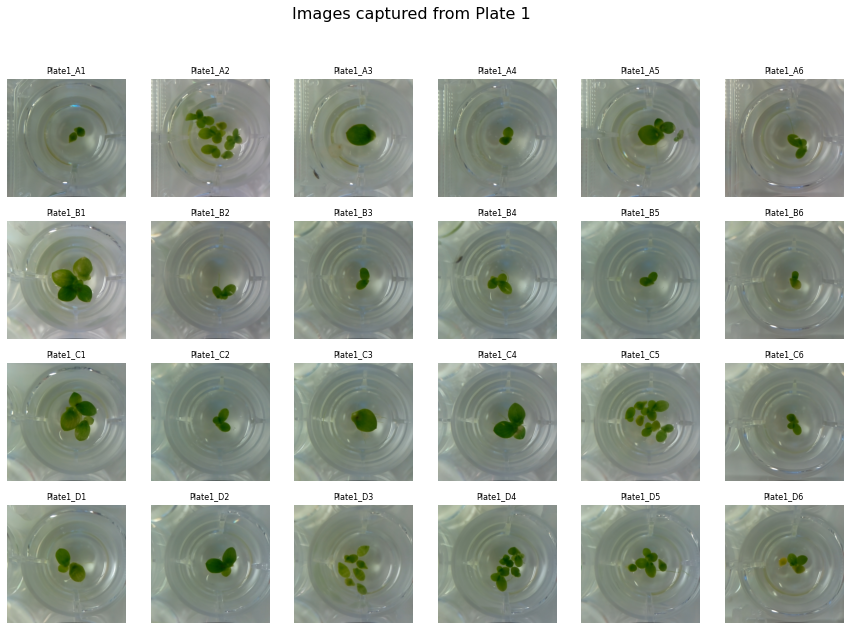

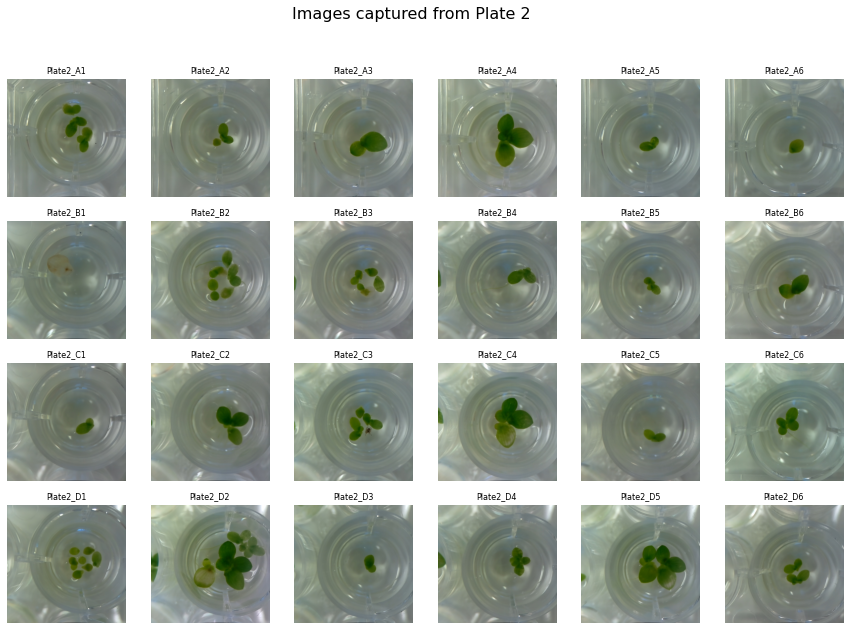

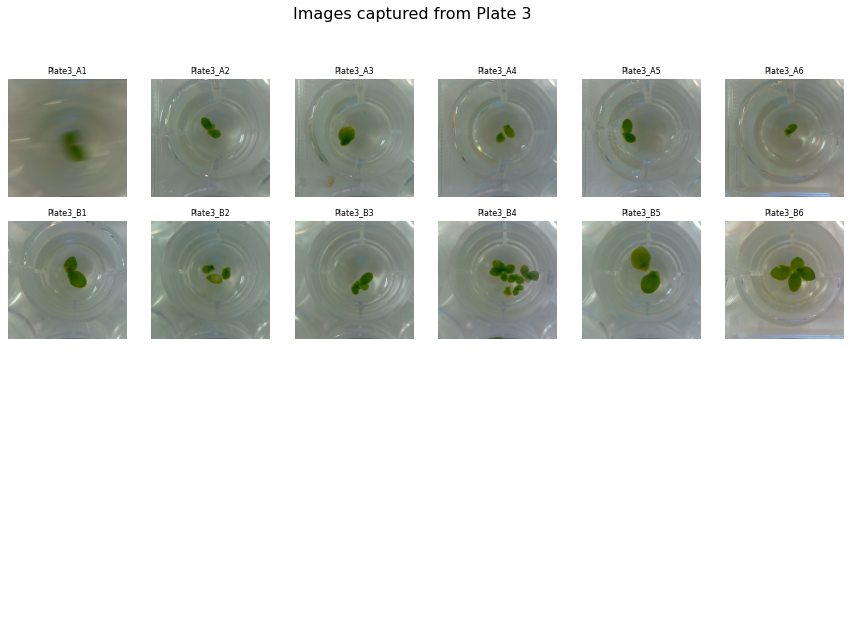

In [19]:
%matplotlib inline

df_with_well_coords = pp.add_well_coords_to_df_from_sample_data_dict(sample_data_dict)

im.image_plates(m, df_with_well_coords, data_dir, expt_name)

plates = list(np.unique(df_with_well_coords['Plate']))
plates = [int(x[-1]) for x in plates]

im.create_plate_image_grid(df_with_well_coords, data_dir)

In [20]:
m.moveTo(z=100)
print("Please remove plates from machine then hit any key to continue")
input()

Please remove plates from machine then hit any key to continue
y


'y'